In [5]:
def get_lists(path):
    performance_list = []
    acc_type_list = []
    f1_type_list = []
    acc_stenosis_list = []
    f1_stenosis_list = []
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            cols = line.split()
            if cols[2] == 'segment-level:':
                performance_list.append(float(cols[4].strip(',')))
                acc_type_list.append(float(cols[6].strip(',')))
                f1_type_list.append(float(cols[8].strip(',')))
                acc_stenosis_list.append(float(cols[10].strip(',')))
                f1_stenosis_list.append(float(cols[12].strip(',')))
    return [np.array(performance_list), np.array(acc_type_list), np.array(f1_type_list), np.array(acc_stenosis_list), np.array(f1_stenosis_list)]

In [23]:
import os
import numpy as np
size = 5
base_path = "/home/gaoyibo/codes/plaque/snapshot/"
folds = [0, 1, 2, 3]


def get_size_result(size):
    total_list = [0, 0, 0, 0, 0]

    for fold_idx in folds:
        path = os.path.join(base_path, 'size'+str(size), 'size' + str(size) + '_fold' + str(fold_idx), 'log.txt')
        fold_list = get_lists(path)
        for idx in range(len(total_list)):
            total_list[idx] += fold_list[idx]

    for idx in range(len(total_list)):
        total_list[idx] /= len(folds)
    return total_list

name_list = ['performance', 'acc_type', 'f1_type', 'acc_stenosis', 'f1_stenosis']

total_list_5 = get_size_result(5)
total_list_3 = get_size_result(3)

# performance_list = total_list[0] / len(folds)
# acc_type_list = total_list[1] / len(folds)
# f1_type_list = total_list[2] / len(folds)
# acc_stenosis_list = total_list[3] / len(folds)
# f1_stenosis_list = total_list[4] / len(folds)

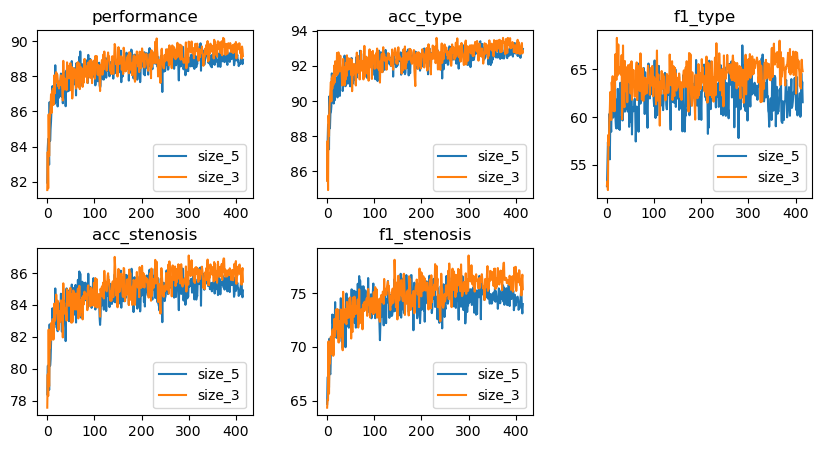

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(5):
    ax = plt.subplot(231 + i)
    ax.set_title(name_list[i])
    plt.plot(range(len(total_list_5[i])), total_list_5[i], label='size_5')
    plt.plot(range(len(total_list_3[i])), total_list_3[i], label='size_3')
    plt.legend()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [35]:
def get_best_result(total_list):
    best_epoch = np.argmax(total_list[0])
    print('best_epoch {}'.format(best_epoch))
    print('performace {}'.format(total_list[0][best_epoch]))
    print('acc_type {}'.format(total_list[1][best_epoch]))
    print('f1_type {}'.format(total_list[2][best_epoch]))
    print('acc_stenosis {}'.format(total_list[3][best_epoch]))
    print('f1_stenosis {}'.format(total_list[4][best_epoch]))

In [37]:
get_best_result(total_list_5)
print('--'*30)
get_best_result(total_list_3)

best_epoch 325
performace 89.8775
acc_type 93.405
f1_type 65.4075
acc_stenosis 86.35
f1_stenosis 76.4375
------------------------------------------------------------
best_epoch 373
performace 90.185
acc_type 93.595
f1_type 66.2
acc_stenosis 86.77
f1_stenosis 77.1525
